# EQUIVALENCE CLASS:
A stimulus class (usually produced through conditional discrimination in matching-to-sample) that includes all possible emergent relations among its members. The properties of an equivalence class are derived from the logical relations of reflexivity, symmetry, and transitivity. **Reflexivity** *refers to the matching of a sample to itself*, sometimes called identity matching (AA, BB, CC, in these examples, each letter pair represents a sample and its matching comparison stimulus). **Symmetry** *refers to the reversibility of a relation (if AB, then BA)*. **Transitivity** *refers to the transfer of the relation to new combinations through shared membership (if AB and BC, then AC)*. 
If these properties are characteristics of a matching to-sample performance, then training AB and BC may produce AC, BA, CA, and CB as emergent relations (reflexivity provides the three other possible relations, AA, BB, and CC). Given AB and BC, for example, the combination of symmetry and transitivity implies the CA relation. The emergence of all possible stimulus relations after only AB and BC are trained through contingencies is the criterion for calling the three stimuli members of an equivalence class. The class can be extended by training new stimulus relations (e.g., if CD is learned, then AD, DA, BD, DB, and DC may be created as emergent relations). Stimuli that are members of an equivalence class are likely also to be functionally equivalent. It remains to be seen whether the logical properties of these classes are fully consistent with their behavioral ones. Cf. ** EQUIVALENCE RELATION**. ([source](http://www.scienceofbehavior.com/lms/mod/glossary/view.php?id=408&mode=letter&hook=E&sortkey=CREATION&sortorder=asc&fullsearch=0&page=3))


# Libraries

In [57]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score

%matplotlib inline
plt.style.use('seaborn')

In [2]:
stims={"A1":[1,0,0,0,0,0,0,0,0,0,0,0],
       "A2":[0,1,0,0,0,0,0,0,0,0,0,0],
       "A3":[0,0,1,0,0,0,0,0,0,0,0,0],
       "A4":[0,0,0,1,0,0,0,0,0,0,0,0],
       "B1":[0,0,0,0,1,0,0,0,0,0,0,0],
       "B2":[0,0,0,0,0,1,0,0,0,0,0,0],
       "B3":[0,0,0,0,0,0,1,0,0,0,0,0],
       "B4":[0,0,0,0,0,0,0,1,0,0,0,0],
       "C1":[0,0,0,0,0,0,0,0,1,0,0,0],
       "C2":[0,0,0,0,0,0,0,0,0,1,0,0],
       "C3":[0,0,0,0,0,0,0,0,0,0,1,0],
       "C4":[0,0,0,0,0,0,0,0,0,0,0,1]
      }

options={"O_1":[1,0,0],
         "O_2":[0,1,0],
         "O_3":[0,0,1],
         "O_0":[0,0,0],
        }

labels=np.array([[i,j,k,l] for i in stims.keys() for j in stims.keys()for k in stims.keys()for l in stims.keys()])
values_x=np.array([np.array(i+j+k+l) for i in stims.values() for j in stims.values()for k in stims.values()for l in stims.values()])

# Test 1: Identify

### Can a shallow classifier identify the stimulus presented in the set?

The first step is check if a classifier can indentify the stimulus presented in the group of stimulus.

In [3]:
h = .02  # step size in the mesh

names = [
    "Nearest Neighbors", 
    "Linear SVM", 
    "RBF SVM", 
#    "Gaussian Process",
    "Decision Tree", 
    "Random Forest", 
    "Neural Net", 
    "AdaBoost",
    "Naive Bayes", 
    "QDA"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [4]:
test1_y=np.array([list(np.bitwise_or(np.bitwise_or(np.bitwise_or(i,j),k),l)) for i in stims.values() for j in stims.values()for k in stims.values()for l in stims.values()])

In [5]:
def test_1_view ():
    # Selects a random stimulus and shows the corresponding encoding, labels and y value
    n_dat=random.randrange(len(values_x))
    print(n_dat)
    print(values_x[n_dat,0:12])
    print(values_x[n_dat,12:24])
    print(values_x[n_dat,24:36])
    print(values_x[n_dat,36:48])
    print(test1_y[n_dat,:])
    print(labels[n_dat,:])

In [6]:
test_1_view ()

14442
[0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0]
[0 1 0 1 0 0 1 0 0 1 0 0]
['C2' 'A4' 'A2' 'B3']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(values_x, test1_y, test_size=.4, random_state=42)

In [9]:
avg_scores=[]
for name, clf in zip(names, classifiers):
    clasif=OneVsRestClassifier(clf).fit(X_train, y_train)
    scr=average_precision_score(y_test,clasif.predict(X_test))
    avg_scores.append(scr)
    print(name,scr)


('Nearest Neighbors', 0.92683252486606327)
('Linear SVM', 1.0)
('RBF SVM', 0.71860933879274969)
('Decision Tree', 1.0)
('Random Forest', 0.68005305813397376)
('Neural Net', 1.0)
('AdaBoost', 1.0)
('Naive Bayes', 1.0)


/home/yagwar/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


('QDA', 0.94934961967977338)


# Reflexivity test
### Can a shallow classificator mark the correct position of the sample when it's presented in the comparators?

In [10]:
reflexivity_labels=[]
reflexivity_values=[]
reflexivity_y=[]
for lab in stims.keys(): 
    rflxvt_labels=labels[(labels[:,0]==lab)&((labels[:,1]==lab)|(labels[:,2]==lab)|(labels[:,3]==lab))]
    rflxvt_values=values_x[(labels[:,0]==lab)&((labels[:,1]==lab)|(labels[:,2]==lab)|(labels[:,3]==lab))]

    rflxvt_values=rflxvt_values[np.sum((rflxvt_labels[:,1:]==lab)*1.0, axis=1)==1]
    rflxvt_labels=rflxvt_labels[np.sum((rflxvt_labels[:,1:]==lab)*1.0, axis=1)==1]
    rflxvt_y=(rflxvt_labels[:,1:]==lab)*1
    
    [reflexivity_labels.append(lbl) for lbl in rflxvt_labels]
    [reflexivity_values.append(vle) for vle in rflxvt_values]
    [reflexivity_y.append(vly) for vly in rflxvt_y]

reflexivity_labels=np.array(reflexivity_labels)
reflexivity_values=np.array(reflexivity_values)
reflexivity_y=np.array(reflexivity_y)

In [11]:
def reflexivity_view():
    n_dat=random.randrange(len(reflexivity_values))
    print(n_dat)
    print(reflexivity_values[n_dat,0:12])
    print(reflexivity_values[n_dat,12:24])
    print(reflexivity_values[n_dat,24:36])
    print(reflexivity_values[n_dat,36:48])
    print(reflexivity_y[n_dat,:])
    print(reflexivity_labels[n_dat,:])

In [12]:
reflexivity_view()

434
[1 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0]
[1 0 0]
['A1' 'A1' 'B2' 'B3']


In [13]:
X_train_reflexivity, X_test_reflexivity, y_train_reflexivity, y_test_reflexivity = train_test_split(reflexivity_values, reflexivity_y, test_size=.4, random_state=42)

In [14]:
avg_scores_reflexivity=[]
for name, clf in zip(names, classifiers):
    clasif=OneVsRestClassifier(clf).fit(X_train_reflexivity, y_train_reflexivity)
    scr=average_precision_score(y_test_reflexivity,clasif.predict(X_test_reflexivity))
    avg_scores_reflexivity.append(scr)
    print(name,scr)

('Nearest Neighbors', 0.9982837483511231)
('Linear SVM', 0.66666666666666663)
('RBF SVM', 0.66666666666666663)
('Decision Tree', 0.60496364084008458)
('Random Forest', 0.66706022083320748)
('Neural Net', 1.0)
('AdaBoost', 0.66666666666666663)
('Naive Bayes', 0.37867934583291024)
('QDA', 0.96594258222349527)


# Equivalence Trainning

Trainning the classes relations

In [15]:
train_pairs=np.array([["A1","B1"],["B1","C1"],
                           ["A2","B2"],["B2","C2"],
                           ["A3","B3"],["B3","C3"],
                           ["A4","B4"],["B4","C4"]])

In [16]:
filt_train_x=np.any(
    [
        [((lbl[0]==pair[0])& #The sample is the first element of the pair
          (lbl[1][0]==pair[1][0])& #The comparator 1 has the same mode (letter) of the second element of the pair
          (lbl[2][0]==pair[1][0])& #The comparator 2 has the same mode (letter) of the second element of the pair
          (lbl[3][0]==pair[1][0])& #The comparator 3 has the same mode (letter) of the second element of the pair
          ((lbl[1]==pair[1])|(lbl[2]==pair[1])|(lbl[3]==pair[1]))&# any of the comparators is the second element of the pair
          ((lbl[1]==pair[1])+(lbl[2]==pair[1])+(lbl[3]==pair[1])==1)# the second element of the pair is presented once in the comparators
         ) for pair in train_pairs] for lbl in labels],# for any of the pairs on every label
axis=1)

train_values=values_x[filt_train_x]
train_labels=  labels[filt_train_x]

train_response=np.any(np.array([
    [[
        ((lbl[0]==pair[0])&(lbl[1]==pair[1])), #The sample is the first element of the pair and the first  comparator is the second element of the pair
        ((lbl[0]==pair[0])&(lbl[2]==pair[1])), #The sample is the first element of the pair and the second comparator is the second element of the pair
        ((lbl[0]==pair[0])&(lbl[3]==pair[1])) #The sample is the first element of the pair and the third  comparator is the second element of the pair
    ] for pair in train_pairs] for lbl in train_labels]# for any of the pairs on every label
), axis=1)*1

In [17]:
def view_train():
    n_dat=random.randrange(len(train_labels))
    print(n_dat)
    print(train_values[n_dat,0:12])
    print(train_values[n_dat,12:24])
    print(train_values[n_dat,24:36])
    print(train_values[n_dat,36:48])
    print(train_response[n_dat,:])
    print(train_labels[n_dat,:])

In [18]:
view_train()

90
[0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0]
[1 0 0]
['A2' 'B2' 'B3' 'B4']


### Full Dataset Trainning

In [75]:
avg_scores_train=[]
train_clasif=[]
for name, clf in zip(names, classifiers):
    clasif=OneVsRestClassifier(clf).fit(train_values, train_response)
    train_clasif.append(clasif)
    scr=average_precision_score(train_response,clasif.predict(train_values))
    avg_scores_train.append(scr)
    print(name,scr)

('Nearest Neighbors', 0.99228395061728392)
('Linear SVM', 0.66666666666666663)
('RBF SVM', 1.0)
('Decision Tree', 0.72222222222222221)
('Random Forest', 0.74845679012345678)
('Neural Net', 0.66666666666666663)
('AdaBoost', 0.66666666666666663)
('Naive Bayes', 0.66666666666666663)
('QDA', 0.98765432098765427)


In [76]:
train_clasif

[OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform'),
           n_jobs=1),
 OneVsRestClassifier(estimator=SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
           n_jobs=1),
 OneVsRestClassifier(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=2, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
           n_jobs=1),
 OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
    

# Symmetry evaluation

In [77]:
filt_symm_x=np.any(
    [
        [((lbl[0]==pair[1])& #The sample is the second element of the pair
          (lbl[1][0]==pair[0][0])& #The comparator 1 has the same mode (letter) of the first element of the pair
          (lbl[2][0]==pair[0][0])& #The comparator 2 has the same mode (letter) of the first element of the pair
          (lbl[3][0]==pair[0][0])& #The comparator 3 has the same mode (letter) of the first element of the pair
          ((lbl[1]==pair[0])|(lbl[2]==pair[0])|(lbl[3]==pair[0]))&# any of the comparators is the first element of the pair
          ((lbl[1]==pair[0])+(lbl[2]==pair[0])+(lbl[3]==pair[0])==1)# the first element of the pair is presented once in the comparators
         ) for pair in train_pairs] for lbl in labels],# for any of the pairs on every label
axis=1)

symmetry_values=values_x[filt_symm_x]
symmetry_labels=  labels[filt_symm_x]

symmetry_response=np.any(np.array([
    [[
        ((lbl[0]==pair[1])&(lbl[1]==pair[0])), #The sample is the second element of the pair and the first  comparator is the first element of the pair
        ((lbl[0]==pair[1])&(lbl[2]==pair[0])), #The sample is the second element of the pair and the second comparator is the first element of the pair
        ((lbl[0]==pair[1])&(lbl[3]==pair[0]))  #The sample is the second element of the pair and the third  comparator is the first element of the pair
    ] for pair in train_pairs] for lbl in symmetry_labels]# for any of the pairs on every label
), axis=1)*1

In [78]:
def view_symmetry():
    n_dat=random.randrange(len(symmetry_labels))
    print(n_dat)
    print(symmetry_values[n_dat,0:12])
    print(symmetry_values[n_dat,12:24])
    print(symmetry_values[n_dat,24:36])
    print(symmetry_values[n_dat,36:48])
    print(symmetry_response[n_dat,:])
    print(symmetry_labels[n_dat,:])

In [79]:
view_symmetry()

126
[0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0]
[0 1 0]
['C2' 'B3' 'B2' 'B1']


In [80]:
avg_scores_symmetry=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(symmetry_response,clasif.predict(symmetry_values))
    avg_scores_symmetry.append(scr)
    print(name,scr)

('Nearest Neighbors', 0.45670625335480408)
('Linear SVM', 0.66666666666666663)
('RBF SVM', 0.66666666666666663)
('Decision Tree', 0.47222222222222215)
('Random Forest', 0.58796296296296291)
('Neural Net', 0.66666666666666663)
('AdaBoost', 0.66666666666666663)
('Naive Bayes', 0.66666666666666663)
('QDA', 0.55290143707009187)


# Transitivity and Equivalence evaluation

In [81]:
eval_pairs=np.array([["A1","C1"],
                      ["A2","C2"],
                      ["A3","C3"],
                      ["A4","C4"]])

## Transitivity

In [82]:
#Transitivity
filt_transitivity_x=np.any(
    [
        [((lbl[0]==pair[0])& #The sample is the first element of the pair
          (lbl[1][0]==pair[1][0])& #The comparator 1 has the same mode (letter) of the second element of the pair
          (lbl[2][0]==pair[1][0])& #The comparator 2 has the same mode (letter) of the second element of the pair
          (lbl[3][0]==pair[1][0])& #The comparator 3 has the same mode (letter) of the second element of the pair
          ((lbl[1]==pair[1])|(lbl[2]==pair[1])|(lbl[3]==pair[1]))&# any of the comparators is the second element of the pair
          ((lbl[1]==pair[1])+(lbl[2]==pair[1])+(lbl[3]==pair[1])==1)# the second element of the pair is presented once in the comparators
         ) for pair in eval_pairs] for lbl in labels],# for any of the pairs on every label
axis=1)

transitivity_values=values_x[filt_transitivity_x]
transitivity_labels=  labels[filt_transitivity_x]

transitivity_response=np.any(np.array([
    [[
        ((lbl[0]==pair[0])&(lbl[1]==pair[1])), #The sample is the first element of the pair and the first  comparator is the second element of the pair
        ((lbl[0]==pair[0])&(lbl[2]==pair[1])), #The sample is the first element of the pair and the second comparator is the second element of the pair
        ((lbl[0]==pair[0])&(lbl[3]==pair[1])) #The sample is the first element of the pair and the third  comparator is the second element of the pair
    ] for pair in eval_pairs] for lbl in transitivity_labels]# for any of the pairs on every label
), axis=1)*1

In [83]:
def view_transitivity():
    n_dat=random.randrange(len(transitivity_labels))
    print(n_dat)
    print(transitivity_values[n_dat,0:12])
    print(transitivity_values[n_dat,12:24])
    print(transitivity_values[n_dat,24:36])
    print(transitivity_values[n_dat,36:48])
    print(transitivity_response[n_dat,:])
    print(transitivity_labels[n_dat,:])

In [84]:
view_transitivity()

85
[0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 1 0 0]
[0 1 0]
['A4' 'C3' 'C4' 'C2']


In [85]:
avg_scores_transitivity=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(transitivity_response,clasif.predict(transitivity_values))
    avg_scores_transitivity.append(scr)
    print(name,scr)

('Nearest Neighbors', 0.71141975308641969)
('Linear SVM', 0.66666666666666663)
('RBF SVM', 0.66666666666666663)
('Decision Tree', 0.69444444444444431)
('Random Forest', 0.4790123456790123)
('Neural Net', 0.66666666666666663)
('AdaBoost', 0.66666666666666663)
('Naive Bayes', 0.66666666666666663)
('QDA', 0.66666666666666663)


 ## Equivalence

In [86]:
# Equivalence
filt_equivalence=np.any(
    [
        [((lbl[0]==pair[1])& #The sample is the second element of the pair
          (lbl[1][0]==pair[0][0])& #The comparator 1 has the same mode (letter) of the first element of the pair
          (lbl[2][0]==pair[0][0])& #The comparator 2 has the same mode (letter) of the first element of the pair
          (lbl[3][0]==pair[0][0])& #The comparator 3 has the same mode (letter) of the first element of the pair
          ((lbl[1]==pair[0])|(lbl[2]==pair[0])|(lbl[3]==pair[0]))&# any of the comparators is the first element of the pair
          ((lbl[1]==pair[0])+(lbl[2]==pair[0])+(lbl[3]==pair[0])==1)# the first element of the pair is presented once in the comparators
         ) for pair in eval_pairs] for lbl in labels],# for any of the pairs on every label
axis=1)

equivalence_values=values_x[filt_equivalence]
equivalence_labels=  labels[filt_equivalence]

equivalence_response=np.any(np.array([
    [[
        ((lbl[0]==pair[1])&(lbl[1]==pair[0])), #The sample is the second element of the pair and the first  comparator is the first element of the pair
        ((lbl[0]==pair[1])&(lbl[2]==pair[0])), #The sample is the second element of the pair and the second comparator is the first element of the pair
        ((lbl[0]==pair[1])&(lbl[3]==pair[0]))  #The sample is the second element of the pair and the third  comparator is the first element of the pair
    ] for pair in eval_pairs] for lbl in equivalence_labels]# for any of the pairs on every label
), axis=1)*1

In [87]:
def view_equivalence():
    n_dat=random.randrange(len(equivalence_labels))
    print(n_dat)
    print(equivalence_values[n_dat,0:12])
    print(equivalence_values[n_dat,12:24])
    print(equivalence_values[n_dat,24:36])
    print(equivalence_values[n_dat,36:48])
    print(equivalence_response[n_dat,:])
    print(equivalence_labels[n_dat,:])

In [88]:
view_equivalence()

86
[0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0]
[0 1 0]
['C4' 'A1' 'A4' 'A2']


In [89]:
avg_scores_equivalence=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(equivalence_response,clasif.predict(equivalence_values))
    avg_scores_equivalence.append(scr)
    print(name,scr)

('Nearest Neighbors', 0.66666666666666663)
('Linear SVM', 0.66666666666666663)
('RBF SVM', 0.66666666666666663)
('Decision Tree', 0.66666666666666663)
('Random Forest', 0.66666666666666663)
('Neural Net', 0.66666666666666663)
('AdaBoost', 0.66666666666666663)
('Naive Bayes', 0.66666666666666663)
('QDA', 0.59566095498438731)


# Results

In [90]:
results_df=pd.DataFrame(np.column_stack([avg_scores,avg_scores_reflexivity,avg_scores_train,avg_scores_symmetry,avg_scores_transitivity,avg_scores_equivalence]),index=names, columns=["Identify", "Reflexivity", "Train", "Symmetry","Transitivity","Equivalence"])
results_df

,Identify,Reflexivity,Train,Symmetry,Transitivity,Equivalence
Nearest Neighbors,0.926833,0.998284,0.992284,0.456706,0.711420,0.666667
Linear SVM,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667
RBF SVM,0.718609,0.666667,1.000000,0.666667,0.666667,0.666667
Decision Tree,1.000000,0.604964,0.722222,0.472222,0.694444,0.666667
Random Forest,0.680053,0.667060,0.748457,0.587963,0.479012,0.666667
Neural Net,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667
AdaBoost,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667
Naive Bayes,1.000000,0.378679,0.666667,0.666667,0.666667,0.666667
QDA,0.949350,0.965943,0.987654,0.552901,0.666667,0.595661


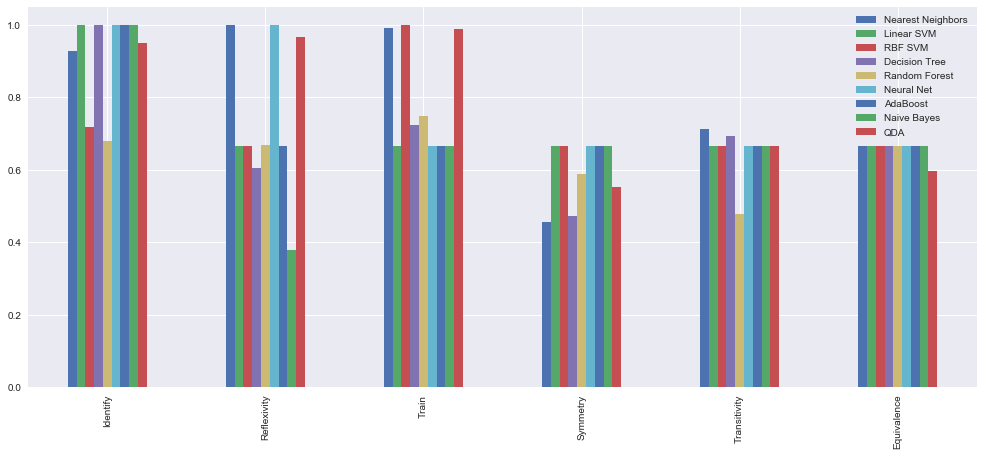

In [91]:
results_df.T.plot(kind="bar", figsize=(17,7))